# YWP tidy data visualisation

In [66]:
import pandas as pd
import numpy as np
import plotnine as p9

In [3]:
water_quality = pd.read_csv("../data/data_tidy.csv")

In [6]:
water_quality

,ID,datetime,month,location,depth_cm,dissolved_oxgen_mg_l,temperature_C,calibration
0,0,1/16/2016,january,1,0,7.57,28.6,valid
1,1,1/16/2016,january,1,50,7.41,28.6,valid
2,2,1/16/2016,january,1,100,7.27,28.3,valid
3,3,1/16/2016,january,1,150,7.20,NaN,valid
4,4,1/16/2016,january,1,200,5.88,27.9,valid
...,...,...,...,...,...,...,...,...
85,85,5/18/2020,may,3,400,3.62,27.6,valid
86,86,5/18/2020,may,3,450,2.27,27.8,valid
87,87,5/18/2020,may,3,500,0.10,27.8,valid
88,88,5/18/2020,may,3,550,0.11,27.9,valid


## aggregations

In [10]:
water_quality["temperature_C"].mean()

28.07078651685393

In [17]:
water_quality.groupby("location")["temperature_C"].mean()

location
1    27.855172
2    28.140000
3    28.210000
Name: temperature_C, dtype: float64

In [24]:
water_quality.groupby("depth_cm")["temperature_C"].median()

depth_cm
0      29.05
50     28.70
100    28.45
150    28.40
200    28.40
250    28.15
300    28.15
350    27.80
400    27.80
450    27.75
500    27.65
550    27.70
600    27.50
650    28.00
700    28.00
750    27.90
800    27.40
Name: temperature_C, dtype: float64

## Grammar of graphics

Opbouw:

1. scatter plot temp/DO
2. boxplot (jitter, biolin, rug)
3. statistics

In [91]:
water_quality = water_quality.dropna()

In [95]:
water_quality

,ID,datetime,month,location,depth_cm,dissolved_oxgen_mg_l,temperature_C,calibration
0,0,1/16/2016,january,1,0,7.57,28.6,valid
1,1,1/16/2016,january,1,50,7.41,28.6,valid
2,2,1/16/2016,january,1,100,7.27,28.3,valid
4,4,1/16/2016,january,1,200,5.88,27.9,valid
5,5,1/16/2016,january,1,250,4.86,27.9,valid
...,...,...,...,...,...,...,...,...
85,85,5/18/2020,may,3,400,3.62,27.6,valid
86,86,5/18/2020,may,3,450,2.27,27.8,valid
87,87,5/18/2020,may,3,500,0.10,27.8,valid
88,88,5/18/2020,may,3,550,0.11,27.9,valid


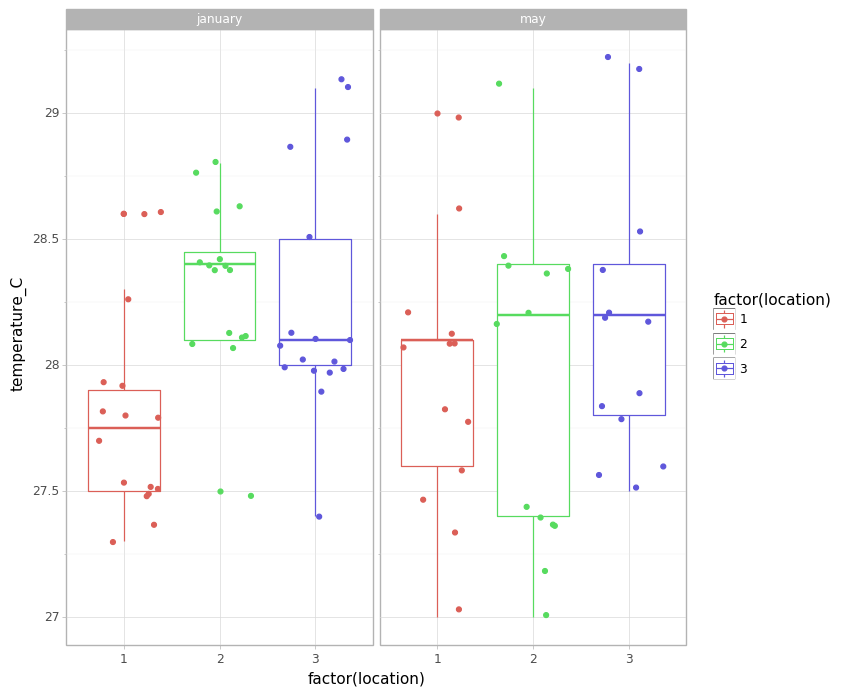

<ggplot: (8766854885165)>

In [203]:
(p9.ggplot(water_quality,
           p9.aes(x='factor(location)',
                  y="temperature_C",
                  color='factor(location)'))
    + p9.geom_boxplot()
    + p9.geom_jitter()
    + p9.facet_wrap("month")
    + p9.theme_light()
    + p9.theme(figure_size=(8, 8))
)

In [206]:
water_quality

,ID,datetime,month,location,depth_cm,dissolved_oxgen_mg_l,temperature_C,calibration
0,0,1/16/2016,january,1,0,7.57,28.6,valid
1,1,1/16/2016,january,1,50,7.41,28.6,valid
2,2,1/16/2016,january,1,100,7.27,28.3,valid
4,4,1/16/2016,january,1,200,5.88,27.9,valid
5,5,1/16/2016,january,1,250,4.86,27.9,valid
...,...,...,...,...,...,...,...,...
85,85,5/18/2020,may,3,400,3.62,27.6,valid
86,86,5/18/2020,may,3,450,2.27,27.8,valid
87,87,5/18/2020,may,3,500,0.10,27.8,valid
88,88,5/18/2020,may,3,550,0.11,27.9,valid


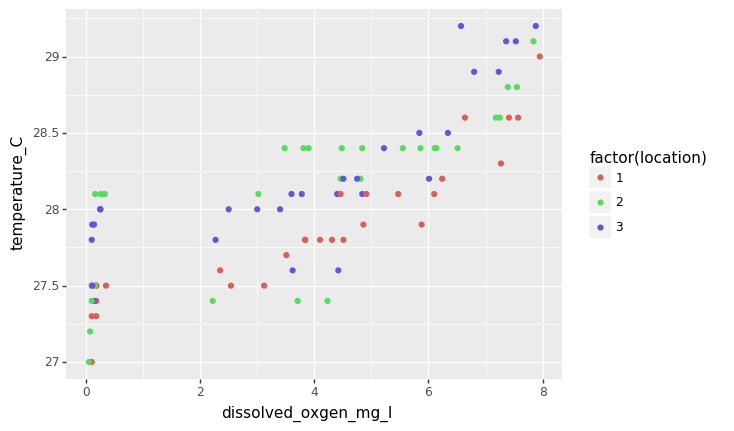

<ggplot: (8766850506157)>

In [287]:
(p9.ggplot(water_quality,
           p9.aes(x='dissolved_oxgen_mg_l',
                  y="temperature_C",
                  color = "factor(location)"))
     + p9.geom_point()
)

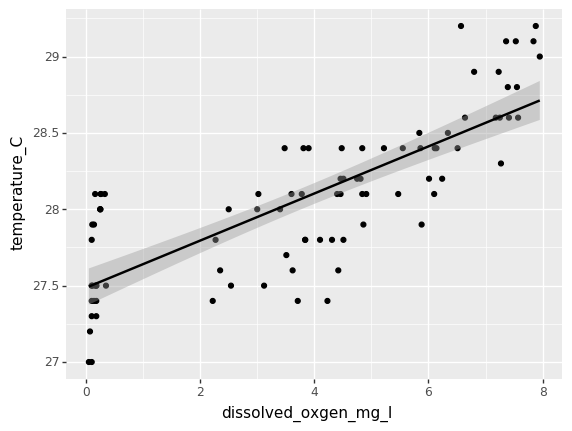

<ggplot: (8766853399513)>

In [278]:
(p9.ggplot(water_quality,
           p9.aes(x='dissolved_oxgen_mg_l',
                  y="temperature_C"))
     + p9.geom_point()
     + p9.geom_smooth(method='lm')
)

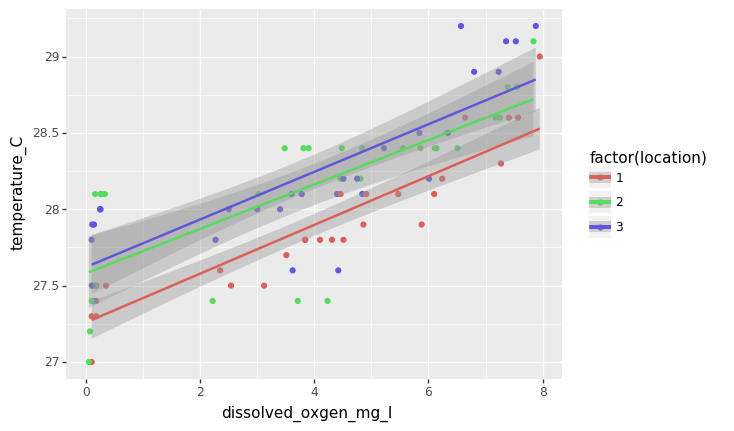

<ggplot: (8766854495153)>

In [273]:
(p9.ggplot(water_quality,
           p9.aes(x='dissolved_oxgen_mg_l',
                  y="temperature_C",
                  color="factor(location)"))
     + p9.geom_point()
     + p9.geom_smooth(method='lm')
)

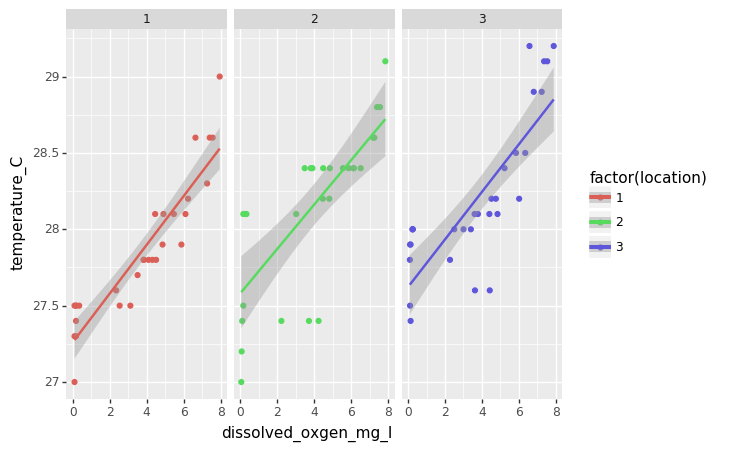

<ggplot: (8766853930653)>

In [274]:
(p9.ggplot(water_quality,
           p9.aes(x='dissolved_oxgen_mg_l',
                  y="temperature_C",
                  color="factor(location)"))
     + p9.geom_point()
     + p9.geom_smooth(method='lm')
     + p9.facet_wrap("location")
)

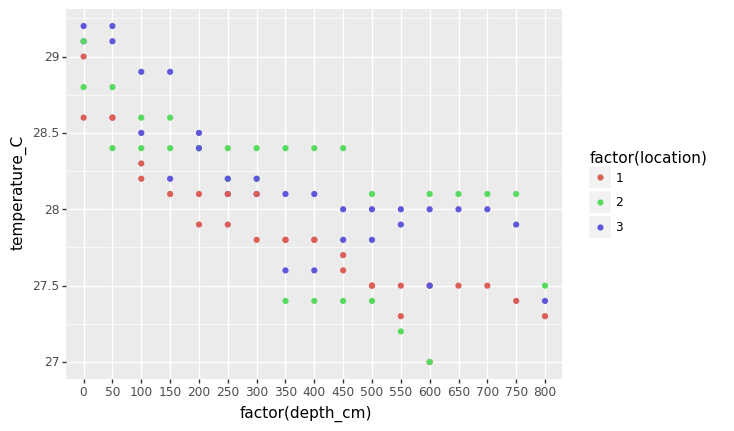

<ggplot: (8766854161041)>

In [252]:
(p9.ggplot(water_quality,
           p9.aes(x='factor(depth_cm)',
                  y="temperature_C",
                  color="factor(location)"))
     + p9.geom_point()
)

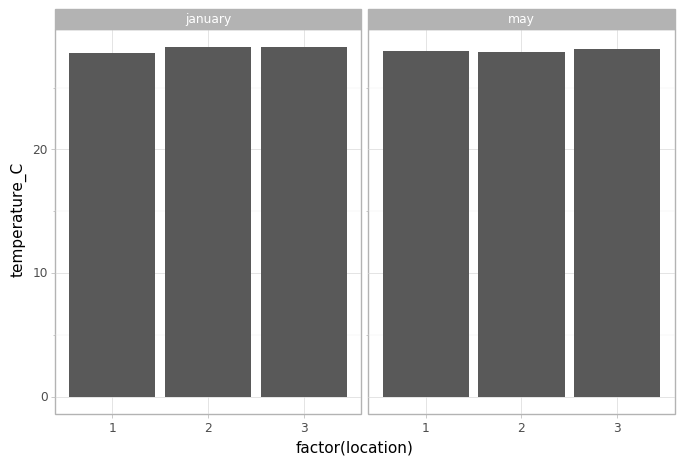

<ggplot: (8766853010377)>

In [240]:
(p9.ggplot(water_quality,
           p9.aes(x='factor(location)',
                  y="temperature_C"))
    + p9.stat_summary(fun_y=np.mean, geom='col', position='dodge')
    + p9.facet_wrap("month")
    + p9.theme_light()
    + p9.theme(figure_size=(8, 5))
)

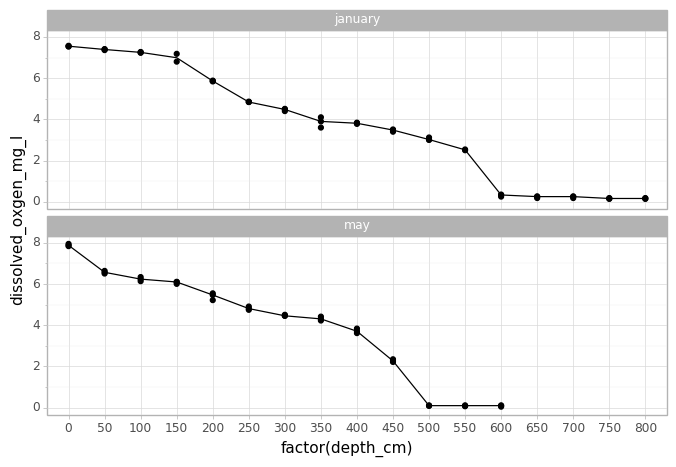

<ggplot: (8766854792753)>

In [333]:
(p9.ggplot(water_quality,
           p9.aes(x='factor(depth_cm)',
                  y="dissolved_oxgen_mg_l"))
    + p9.geom_point()
    + p9.stat_summary(fun_y=np.median, geom='line', group=1)
    + p9.facet_wrap("month", ncol=1)
    + p9.theme_light()
    + p9.theme(figure_size=(8, 5))
)

This works because every geom has a default stat; and every stat has a default geom (geom_col identityy is max)

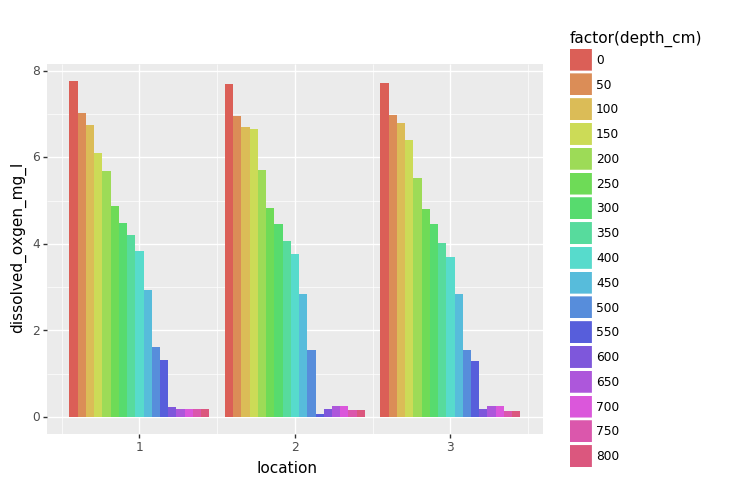

<ggplot: (8766850965233)>

In [434]:
(p9.ggplot(water_quality,
           p9.aes(x='location',
                  y="dissolved_oxgen_mg_l",
                  fill = "factor(depth_cm)"))
     + p9.stat_summary(fun_y=np.mean, geom="col", position="dodge")  # USE THIS
)

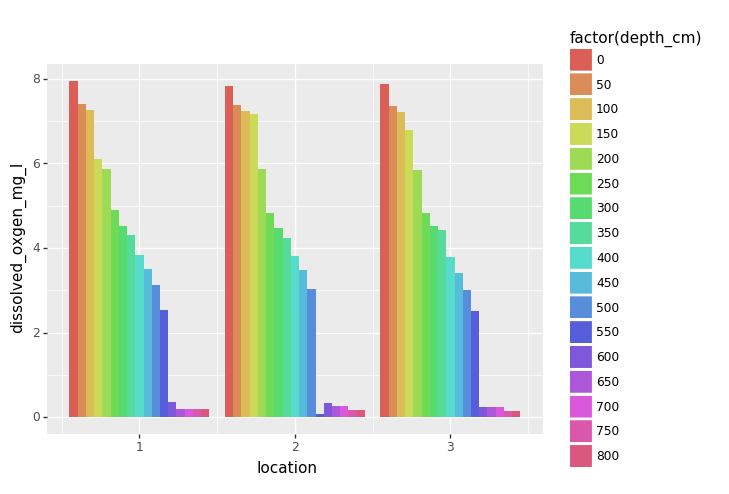

<ggplot: (8766857155697)>

In [436]:
(p9.ggplot(water_quality,
           p9.aes(x='location',
                  y="dissolved_oxgen_mg_l",
                  fill = "factor(depth_cm)"))
     + p9.geom_col(position="dodge")
     #+ p9.facet_wrap("month", ncol=2)
)

In [359]:
water_quality

,ID,datetime,month,location,depth_cm,dissolved_oxgen_mg_l,temperature_C,calibration
0,0,1/16/2016,january,1,0,7.57,28.6,valid
1,1,1/16/2016,january,1,50,7.41,28.6,valid
2,2,1/16/2016,january,1,100,7.27,28.3,valid
4,4,1/16/2016,january,1,200,5.88,27.9,valid
5,5,1/16/2016,january,1,250,4.86,27.9,valid
...,...,...,...,...,...,...,...,...
85,85,5/18/2020,may,3,400,3.62,27.6,valid
86,86,5/18/2020,may,3,450,2.27,27.8,valid
87,87,5/18/2020,may,3,500,0.10,27.8,valid
88,88,5/18/2020,may,3,550,0.11,27.9,valid


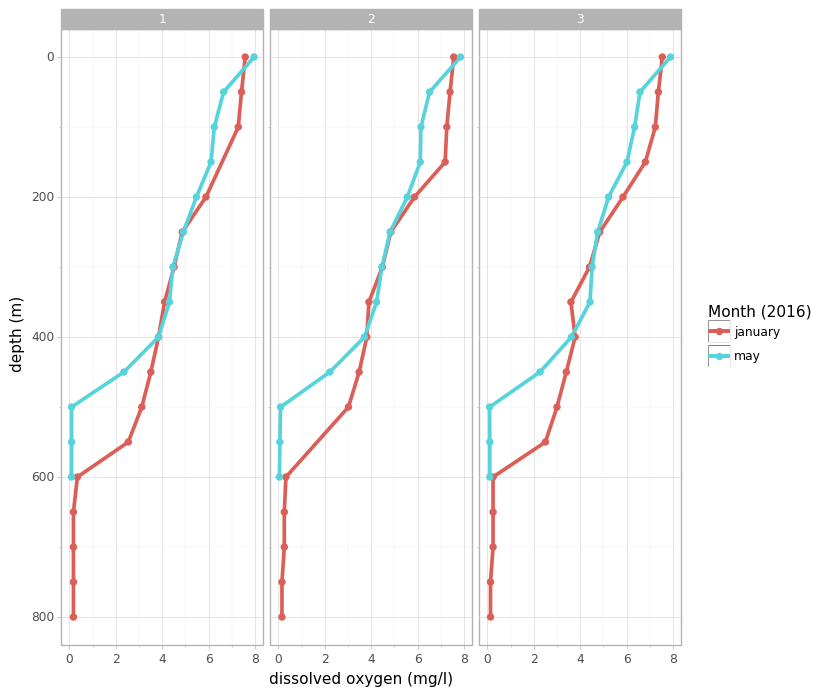

<ggplot: (8766853493653)>

In [138]:
(p9.ggplot(water_quality,
           p9.aes(y='depth_cm', 
                  x='dissolved_oxgen_mg_l', 
                  color="month"))
    + p9.geom_path(size=1.5)
    + p9.geom_point(size=2)
    + p9.facet_wrap(facets='location')
    + p9.scale_y_reverse()
    + p9.theme_light()
    + p9.labs(x="dissolved oxygen (mg/l)", 
              y="depth (m)", 
              color="Month (2016)")
    + p9.theme(figure_size=(8, 8))
)

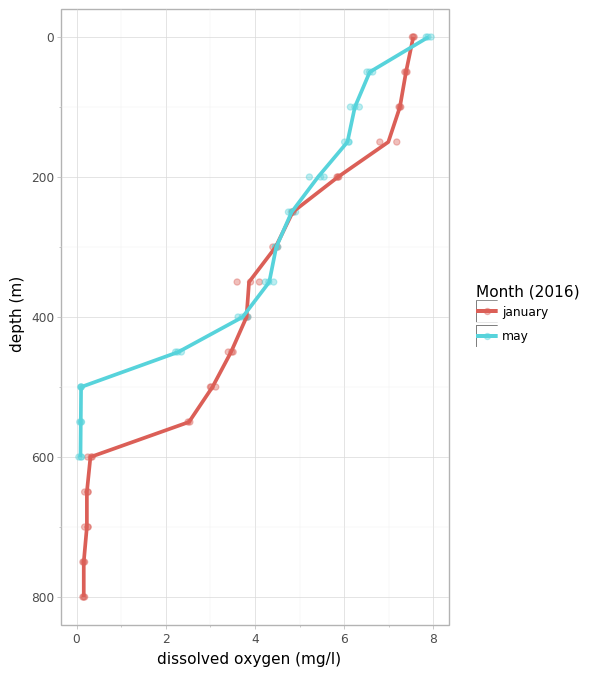

<ggplot: (8766851039433)>

In [205]:
(p9.ggplot(water_quality,
           p9.aes(x='depth_cm', 
                  y='dissolved_oxgen_mg_l', 
                  color="month"))
    + p9.geom_point(size=2, alpha=0.4)
    + p9.stat_summary(fun_y=np.mean, geom="line", size=1.5)
    + p9.coord_flip()
    + p9.scale_x_reverse()
    + p9.labs(y="dissolved oxygen (mg/l)", 
              x="depth (m)", 
              color="Month (2016)")
    + p9.theme_light()
    + p9.theme(figure_size=(5, 8))
)